## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [39]:
# Checking the number of mice.
mice_count = study_df["Mouse ID"].nunique()
mice_count

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_rows = study_df[study_df.duplicated(['Mouse ID','Timepoint'])]
dupe_rows.nunique()


Mouse ID              1
Timepoint             5
Tumor Volume (mm3)    5
Metastatic Sites      2
Drug Regimen          1
Sex                   1
Age_months            1
Weight (g)            1
dtype: int64

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 

print(dupe_rows)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean_df = study_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
study_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [44]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = study_clean_df["Mouse ID"].nunique()
new_mice_count

249

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_working_df = study_clean_df

tumor_mean = tumor_working_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = tumor_working_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = tumor_working_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_stdev = tumor_working_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = tumor_working_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_c_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})
tumor_c_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg_df = study_clean_df
tumor_agg_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

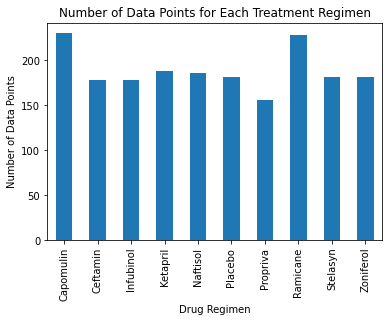

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

barpd_data = study_clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_pd = barpd_data.plot.bar(rot='vertical')

# Set labels for axes
bar_pd.set_xlabel("Drug Regimen")
bar_pd.set_ylabel("Number of Data Points")
bar_pd.set_title("Number of Data Points for Each Treatment Regimen")

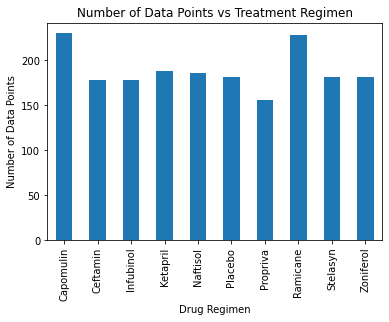

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barpyp_data = study_clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_pyp = pd.DataFrame(barpyp_data)

plt.xdata = bar_pyp.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points vs Treatment Regimen')

plt.show()

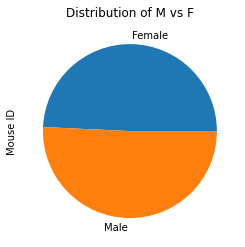

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

piepd_data = study_clean_df.groupby('Sex').count()['Mouse ID']
pie_pd = piepd_data.plot.pie(y='Sex',title='Distribution of M vs F')

# pie_pd.set_facecolor('lightgrey')


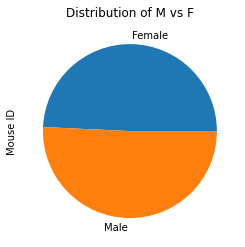

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

piepyp_data = study_clean_df.groupby('Sex').count()['Mouse ID']
pie_pyp = pd.DataFrame(piepyp_data)

plt.pie(piepyp_data,labels=piepyp_data.index);
plt.title('Distribution of M vs F')
plt.ylabel('Mouse ID')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
c_df = study_clean_df.loc[study_clean_df["Drug Regimen"] == "Capomulin",:]
r_df = study_clean_df.loc[study_clean_df["Drug Regimen"] == "Ramicane", :]
i_df = study_clean_df.loc[study_clean_df["Drug Regimen"] == "Infubinol", :]
ce_df = study_clean_df.loc[study_clean_df["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
#Timepoint/ C/R/I/CE
c_max = c_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
c_max_df = pd.DataFrame(c_max)

r_max = r_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
r_max_df = pd.DataFrame(r_max)

i_max = i_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
i_max_df = pd.DataFrame(i_max)

ce_max = ce_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
ce_max_df = pd.DataFrame(ce_max)

# .rename(columns={'Timepoint': 'max_timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
c_max_merge = pd.merge(c_max_df, study_clean_df, how="left", on=['Mouse ID','Timepoint'])
r_max_merge = pd.merge(r_max_df, study_clean_df, how="left", on=['Mouse ID','Timepoint'])
i_max_merge = pd.merge(i_max_df, study_clean_df, how="left", on=['Mouse ID','Timepoint'])
ce_max_merge = pd.merge(ce_max_df, study_clean_df, how="left", on=['Mouse ID','Timepoint'])
c_max_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [53]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes


# calculate bounds by drug (much easier) --------Capomulin
# track tumor volume in list
c_tumors = c_max_merge["Tumor Volume (mm3)"]

# determine quartiles. then IQR
c_quartiles = c_tumors.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

# determine upper and lower bounds
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

# print the bounds
print(f"Capomulin potential outliers could be values below {c_lower_bound} and above {c_upper_bound} could be outliers.")


# calculate bounds by drug (much easier) --------Ramicane
# track tumor volume in list
r_tumors = r_max_merge["Tumor Volume (mm3)"]

# determine quartiles. then IQR
r_quartiles = r_tumors.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

# determine upper and lower bounds
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Ramicane potential outliers could be values below {r_lower_bound} and above {r_upper_bound} could be outliers.")


# calculate bounds by drug (much easier) --------Infubinol
# track tumor volume in list
i_tumors = i_max_merge["Tumor Volume (mm3)"]

# determine quartiles. then IQR
i_quartiles = i_tumors.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

# determine upper and lower bounds
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Infubinol potential outliers could be values below {i_lower_bound} and above {i_upper_bound} could be outliers.")


# calculate bounds by drug (much easier) --------Ceftamin
# track tumor volume in list
ce_tumors = ce_max_merge["Tumor Volume (mm3)"]

# determine quartiles. then IQR
ce_quartiles = ce_tumors.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq

# determine upper and lower bounds
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"Ceftamin potential outliers could be values below {ce_lower_bound} and above {ce_upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


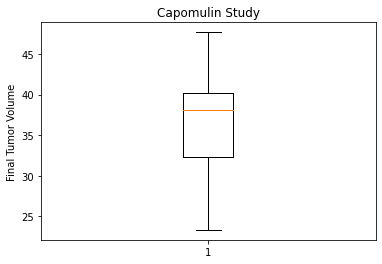

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Study')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(c_tumors)
plt.show()

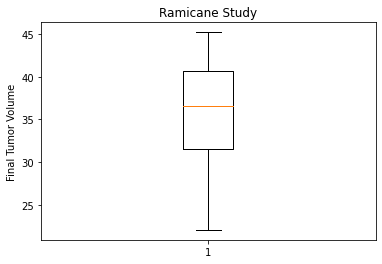

In [55]:
# Ramicane final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Study')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(r_tumors)
plt.show()

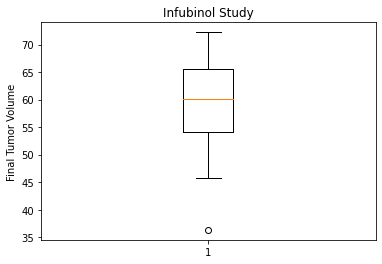

In [56]:
# Infubinol final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Study')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(i_tumors)
plt.show()

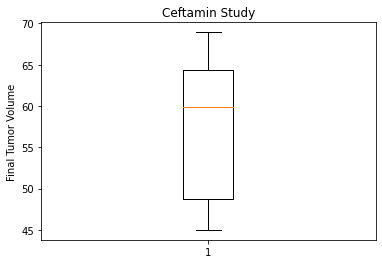

In [57]:
# Ceftamin final tumor volume of each mouse 
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Study')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(ce_tumors)
plt.show()

## Line and Scatter Plots

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = c_df.loc[c_df["Mouse ID"] == "g316",:]
line_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
241,g316,0,45.000000,0,Capomulin,Female,22,22
410,g316,5,44.022752,0,Capomulin,Female,22,22
586,g316,10,44.502042,0,Capomulin,Female,22,22
807,g316,15,45.216743,0,Capomulin,Female,22,22
1017,g316,20,45.933322,1,Capomulin,Female,22,22
1249,g316,25,46.809225,1,Capomulin,Female,22,22
1311,g316,30,44.221480,2,Capomulin,Female,22,22
1558,g316,35,44.702833,2,Capomulin,Female,22,22
1715,g316,40,45.565821,2,Capomulin,Female,22,22
1791,g316,45,40.159220,2,Capomulin,Female,22,22


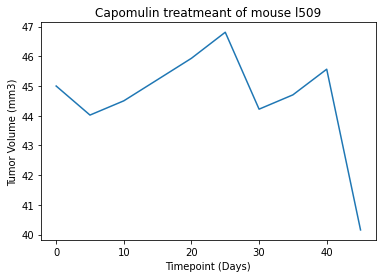

In [59]:
x_axis_tp = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_tp,y_axis,)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lineplotchart')
plt.show()

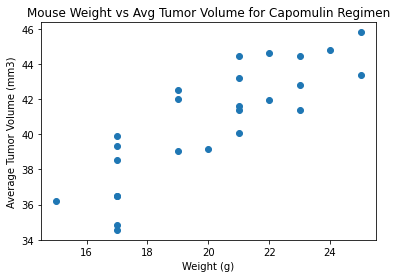

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

c_df_average = c_df.groupby(['Mouse ID']).mean()
plt.scatter(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.savefig('scatterplotaverage')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


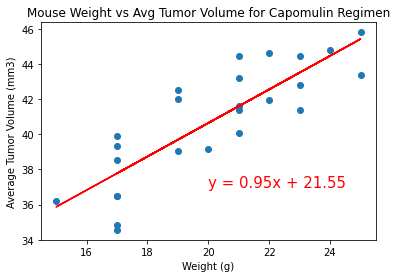

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = c_df_average['Weight (g)']
y = c_df_average['Tumor Volume (mm3)']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight vs Avg Tumor Volume for Capomulin Regimen')
plt.show()